
# Project: Investigate No-show appointments data.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

>1. ScheduledDay column is the date and time of when the appointment is scheduled
>2. AppointmentDay is the date and time of the appointment made.
>3. Gender, and Age are of the patients.
>4. Neighbourhood is of the hospital where the appointment is made.
>5. SMS_received indicates whether an SMS message was sent to the patient to remind them of the appointment
>6. Hypertension, Diabetes and Alcoholism are what their names indicate respectively. 
>7. Handicap column contains a integer ranging from 0 to 4, indicating the number of handicaps the patient is suffering from.
>8. No_show column takes string values of either 'Yes' or 'No'. A 'Yes' indicates the patient DID NOT show up for the appointment.
>9. AppointmentID. As each row represents one appointment, the appointment_ID values should be unique.
>10. PatientID is the ID of the every patient.

>***Questions asked***
>>Is there any correlation between gender and appointments?
>>Is there a trend in appointments made with respect to age of the patient?
>>What proportion of people did not show up for appointment?
>>what factors are
important for us to know in order to
predict if a patient will
show up for their
scheduled
appointment?

In [1]:
# This cell is to set up import statements for all of the packages that we
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(20)

PatientId  AppointmentID Gender          ScheduledDay  \
0   2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1   5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2   4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3   8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4   8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5   9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6   7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7   3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8   5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9   7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10  7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11  7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12  5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13  9.113946e+14        5636249      M  2016-04-28T14:52:07Z   
14  9.988472e+13        5633951      F  2016-04-28T10:06:24Z   
15  9.994839e+10        5620206      F  2016-04-26T08:47:27Z   
16  8.457439e+13        5633121      M  2016-04-28T08:51:47Z   
17  1.479497e+13        5633460      F  2016-04-28T09:28:57Z   
18  1.713538e+13        5621836      F  2016-04-26T10:54:18Z   
19  7.223289e+12        5640433      F  2016-04-29T10:43:14Z   

          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0   2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2   2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3   2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4   2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5   2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   
6   2016-04-29T00:00:00Z   23         GOIABEIRAS            0             0   
7   2016-04-29T00:00:00Z   39         GOIABEIRAS            0             0   
8   2016-04-29T00:00:00Z   21         ANDORINHAS            0             0   
9   2016-04-29T00:00:00Z   19          CONQUISTA            0             0   
10  2016-04-29T00:00:00Z   30     NOVA PALESTINA            0             0   
11  2016-04-29T00:00:00Z   29     NOVA PALESTINA            0             0   
12  2016-04-29T00:00:00Z   22     NOVA PALESTINA            1             0   
13  2016-04-29T00:00:00Z   28     NOVA PALESTINA            0             0   
14  2016-04-29T00:00:00Z   54     NOVA PALESTINA            0             0   
15  2016-04-29T00:00:00Z   15     NOVA PALESTINA            0             0   
16  2016-04-29T00:00:00Z   50     NOVA PALESTINA            0             0   
17  2016-04-29T00:00:00Z   40          CONQUISTA            1             0   
18  2016-04-29T00:00:00Z   30     NOVA PALESTINA            1             0   
19  2016-04-29T00:00:00Z   46           DA PENHA            0             0   

    Diabetes  Alcoholism  Handcap  SMS_received No-show  
0          0           0        0             0      No  
1          0           0        0             0      No  
2          0           0        0             0      No  
3          0           0        0             0      No  
4          1           0        0             0      No  
5          0           0        0             0      No  
6          0           0        0             0     Yes  
7          0           0        0             0     Yes  
8          0           0        0             0      No  
9          0           0        0             0      No  
10         0           0        0             0      No  
11         0           0        0             1     Yes  
12         0           0        0             0      No  
13         0           0        0             0      No  
14         0           0        0             0      No  
15         0           0        0             1      No  
16         0    

## Assessing Data

In [4]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205

In [5]:
# Number of samples and Cloumns
print(df.shape)
print()
# Features with Missing vlaues 
print('Columns with missing values')
print(df.isnull().sum())
print()
# Diplicated rows
print("The number of duplicated rows in the data are",df.duplicated().sum())
# Number of unique values in each feature
print()
print('Number of unique values in each feature:-')
print(df.nunique())


(110527, 14)

Columns with missing values
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The number of duplicated rows in the data are 0

Number of unique values in each feature:-
PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


###### Results:-
1. Rows - 110527, Columns - 14
2. There are no features with missing values.
3. There are no duplicated rows and also each appointment id is unique.
4. The Patient id may not be unique since the same patient may be taking appointments multiple times. But the datatype of the column is float and upon looking the data we find that there are some fractional ids.
5. The datatype of scheduled day and appointment day is string(object) insted of Datetype.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


For consistency and to reduce errors, columns will be renamed in snake_case. Handcap and Hipertension will have their spellings changed into handicap and hypertension respectively.

In [7]:
df.columns = [
    'patient_ID', 'appointment_ID', 'gender', 'scheduled_day',
    'appointment_day', 'age', 'neighbourhood', 'scholarship',
    'hypertension', 'diabetes', 'alcoholism', 'handicap', 'SMS_received',
    'no_show'
    ]
df.head(1)

patient_ID  appointment_ID gender         scheduled_day  \
0  2.987250e+13         5642903      F  2016-04-29T18:38:08Z   

        appointment_day  age    neighbourhood  scholarship  hypertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handicap  SMS_received no_show  
0         0           0         0             0      No

Now, we'll take a look at each of the columns, clean and/or modify them and add new columns as needed.

### patient_ID
This column is the id of the patient. 
Datatype is float.
There are 62299 unique ids.

In [8]:
# to make sure that all the decimals get displayed.
pd.set_option('display.float_format', '{:9f}'.format)
print(df.patient_ID.head(5))

0    29872499824296.000000
1   558997776694438.000000
2     4262962299951.000000
3      867951213174.000000
4     8841186448183.000000
Name: patient_ID, dtype: float64


In [9]:
# we see the columns with fractional ids
print(df[~df.patient_ID.apply(lambda x:x.is_integer())]['patient_ID']) # x.is_integer() returns true if integer

3950      93779.529270
73228    537615.284760
73303    141724.166550
100517    39217.844390
105430    43741.756520
Name: patient_ID, dtype: float64


>We can see that there are some columns having fractional id. The obvious guess is that the decimal points were typos(e.g. a patient made two appointments, and during data input in one appointment, the patient ID was incorrectly input-ted).

>We can check that if the decimal points are removed, whether these patient IDs would appear in other records. Simply multiply by 100000 and compare the patient_ID with others.

>Turns out that none of the columns matched even after removing the decimal. Therefore they are unique and there is no reason to change them yet.

### appointment_ID
As each row represents one appointment.

In [10]:
len(df.appointment_ID.unique())

110527

The number of unique appointment_ID values, 110527, is the same as the number of rows. That means all appointment_ID are unique.

We'll make appointment ID the index.

In [11]:
df.set_index('appointment_ID', inplace=True)

### scheduled_day
Datatype is object(string). Lets parse it into datetime object

In [12]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)

### appointment_day
This column is the date of the appointment. There is a time element in the column but it is all 00:00:00 which means the time of the appointment is not recorded.

We will also add a column 
>lead_days:

>Since we don't have the time for the appointment, we'll just compute the difference in days between the scheduled_day and appointment_day, assuming all scheduling is done at 00:00:00.
>As such, same-day appointments should show a 0. Any value < 0 means there may be something wrong with the data as it doens't make sense for the appointment to happen before the scheduling.



In [13]:
def get_day(datetime_object):
    '''This function returns only the date part of a datetime'''
    return datetime_object.date()

# Parse the date from string
df.appointment_day = pd.to_datetime(df.appointment_day)
# Get lead_days column in timedelta64[ns] format
df['lead_days'] = (
    df.appointment_day.apply(get_day)
    - df.scheduled_day.apply(get_day)
    )
# Change the datatype into integer
df.lead_days = (
    (df.lead_days.astype('timedelta64[D]')).astype(int)
    )

# display the dataframe
df.head()

patient_ID gender       scheduled_day  \
appointment_ID                                                     
5642903         29872499824296.000000      F 2016-04-29 18:38:08   
5642503        558997776694438.000000      M 2016-04-29 16:08:27   
5642549          4262962299951.000000      F 2016-04-29 16:19:04   
5642828           867951213174.000000      F 2016-04-29 17:29:31   
5642494          8841186448183.000000      F 2016-04-29 16:07:23   

               appointment_day  age      neighbourhood  scholarship  \
appointment_ID                                                        
5642903             2016-04-29   62    JARDIM DA PENHA            0   
5642503             2016-04-29   56    JARDIM DA PENHA            0   
5642549             2016-04-29   62      MATA DA PRAIA            0   
5642828             2016-04-29    8  PONTAL DE CAMBURI            0   
5642494             2016-04-29   56    JARDIM DA PENHA            0   

                hypertension  diabetes  alcoholism  handicap  SMS_received  \
appointment_ID                                                               
5642903                    1         0           0         0             0   
5642503                    0         0           0         0             0   
5642549                    0         0           0         0             0   
5642828                    0         0           0         0             0   
5642494                    1         1           0         0             0   

               no_show  lead_days  
appointment_ID                     
5642903             No          0  
5642503             No          0  
5642549             No          0  
5642828             No          0  
5642494             No          0

Finally we'll look for entries whose appointment_day is earlier than the scheduled_day. These will be clear errors as it doesn't make sense for one to schedule an appointment for a date in the past.

In [14]:
# See if any entries have the appointment_day earlier than the scheduled_day
df[df.lead_days < 0]

patient_ID gender       scheduled_day  \
appointment_ID                                                     
5679978          7839272661752.000000      M 2016-05-10 10:51:53   
5715660          7896293967868.000000      F 2016-05-18 14:50:41   
5664962         24252258389979.000000      F 2016-05-05 13:43:58   
5686628        998231581612122.000000      F 2016-05-11 13:49:20   
5655637          3787481966821.000000      M 2016-05-04 06:50:57   

               appointment_day  age  neighbourhood  scholarship  hypertension  \
appointment_ID                                                                  
5679978             2016-05-09   38    RESISTÊNCIA            0             0   
5715660             2016-05-17   19  SANTO ANTÔNIO            0             0   
5664962             2016-05-04   22     CONSOLAÇÃO            0             0   
5686628             2016-05-05   81  SANTO ANTÔNIO            0             0   
5655637             2016-05-03    7     TABUAZEIRO            0             0   

                diabetes  alcoholism  handicap  SMS_received no_show  \
appointment_ID                                                         
5679978                0           0         1             0     Yes   
5715660                0           0         1             0     Yes   
5664962                0           0         0             0     Yes   
5686628                0           0         0             0     Yes   
5655637                0           0         0             0     Yes   

                lead_days  
appointment_ID             
5679978                -1  
5715660                -1  
5664962                -1  
5686628                -6  
5655637                -1

>5 entries have negative lead_days. Whether these are typos or humans trying to get around the system or other reasons, we cannot tell.
>
>Whatever the cause, if we use the duration between scheduled_day and appointment_day as a feature to predict whether the patient is going to show up, these entries will cause problems, or at least introduce noise.
>
>Since there are only so few entries with this problem, we are going to delete them.

In [15]:
# Dropping the rows where the scheduled_day is later than the appointment_day
df.drop(df[df.lead_days < 0].index, inplace=True)

### age
This column is the age of the patients.

In [16]:
df.age.describe()

count   110522.000000
mean        37.089041
std         23.110064
min         -1.000000
25%         18.000000
50%         37.000000
75%         55.000000
max        115.000000
Name: age, dtype: float64

We can see that age has a minimum value of -1 which is not possible, therefore we will delete these columns . Also max age of 115 althogh possible should be rare. Let's check it out.

In [17]:
df.age.value_counts(ascending=True).head()

-1      1
 99     1
 102    2
 100    4
 115    5
Name: age, dtype: int64

5 appointments with patient's age 115 is fairly possible; we keep it. But we delete the one appointment with age -1

In [18]:
i=df[df.age == -1].index
df.drop(i, inplace=True)
(df.age == -1).count()

110521

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1224ea908>,
      dtype=object)

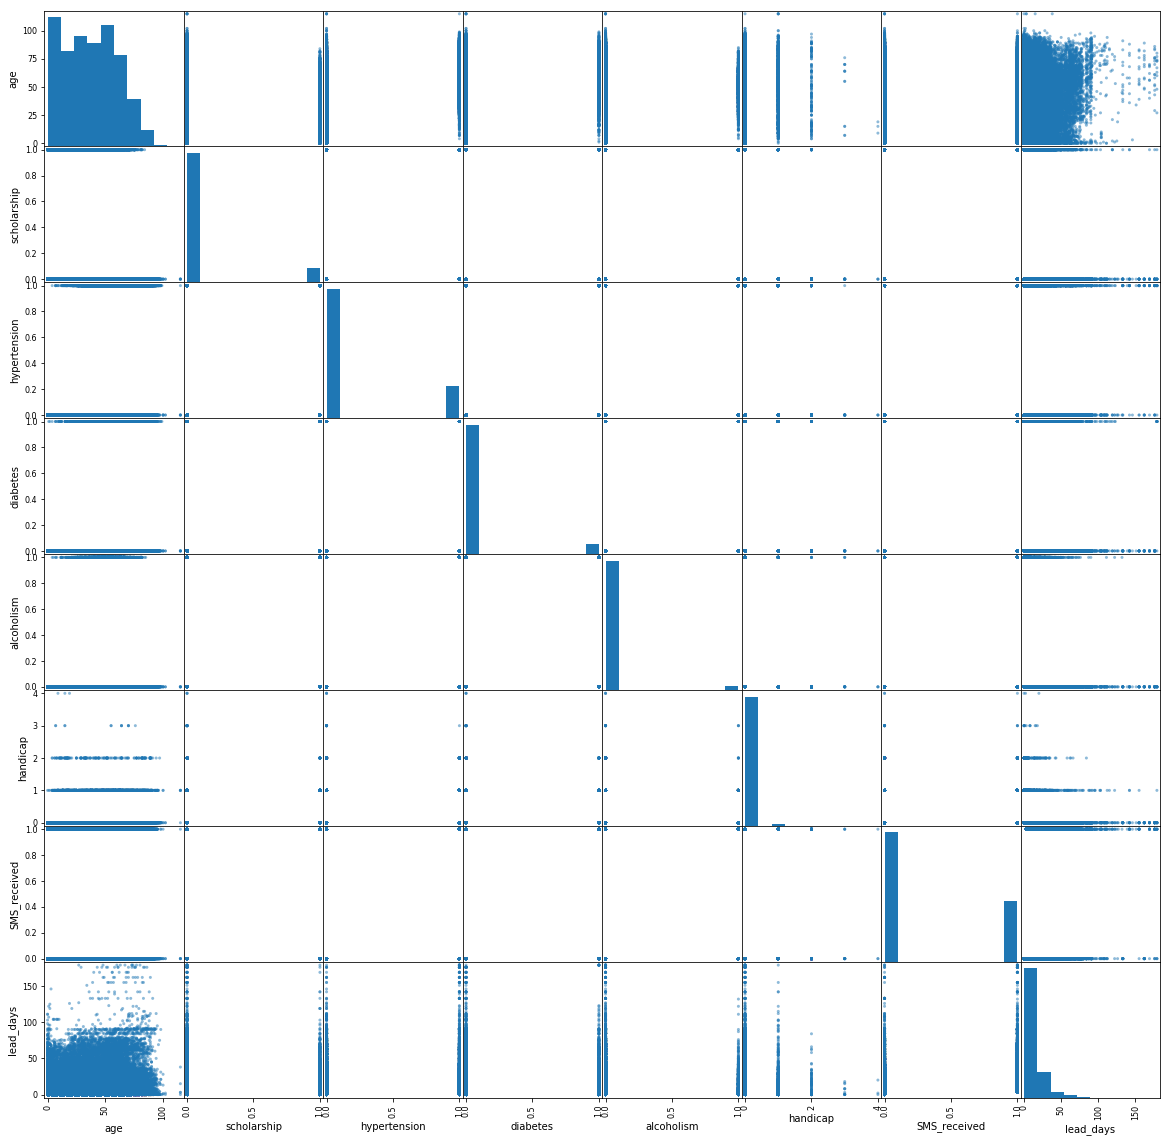

In [23]:
pd.plotting.scatter_matrix(df.iloc[:, 2:], figsize=(20,20))

### Which sex takes more appointments?

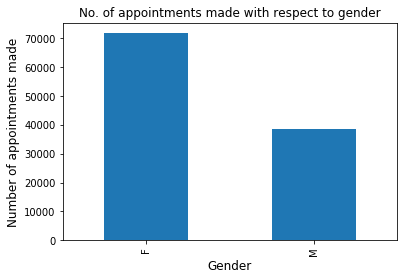

In [140]:
df.gender.value_counts().plot(kind='bar')
plt.title('No. of appointments made with respect to gender')
plt.xlabel('Gender', size=12)
plt.ylabel('Number of appointments made', size = 12);


Female patients make up almost two thirds of the visits. Interesting number, but we can't say we've spotted anything unreasonable. Although it might be that women are more concerned of their body then men are.

### Is there a trend in appointments with respect to age of the patient?
At higher ages, counts start to get sparse, therefore we'll bin the age values and put it in a new column:
>age_group:

0-9 will be group 0, 10-19 will be group 1, 20-29 will be group 2, etc. Since ages 100 or above are rare, we'll put any age 90 or above into group 9. The single case of the age being -1 will also be in group 0.

In [141]:
df2 = df
df2['age_group'] = (
    df2.age.apply(lambda x: min(int(x / 10) , 9))
    )
df2.head()

patient_ID gender       scheduled_day  \
appointment_ID                                                     
5642903         29872499824296.000000      F 2016-04-29 18:38:08   
5642503        558997776694438.000000      M 2016-04-29 16:08:27   
5642549          4262962299951.000000      F 2016-04-29 16:19:04   
5642828           867951213174.000000      F 2016-04-29 17:29:31   
5642494          8841186448183.000000      F 2016-04-29 16:07:23   

               appointment_day  age      neighbourhood  scholarship  \
appointment_ID                                                        
5642903             2016-04-29   62    JARDIM DA PENHA            0   
5642503             2016-04-29   56    JARDIM DA PENHA            0   
5642549             2016-04-29   62      MATA DA PRAIA            0   
5642828             2016-04-29    8  PONTAL DE CAMBURI            0   
5642494             2016-04-29   56    JARDIM DA PENHA            0   

                hypertension  diabetes  alcoholism  handicap  SMS_received  \
appointment_ID                                                               
5642903                    1         0           0         0             0   
5642503                    0         0           0         0             0   
5642549                    0         0           0         0             0   
5642828                    0         0           0         0             0   
5642494                    1         1           0         0             0   

               no_show  lead_days  is_handicapped  age_group  
appointment_ID                                                
5642903             No          0           False          6  
5642503             No          0           False          5  
5642549             No          0           False          6  
5642828             No          0           False          0  
5642494             No          0           False          5

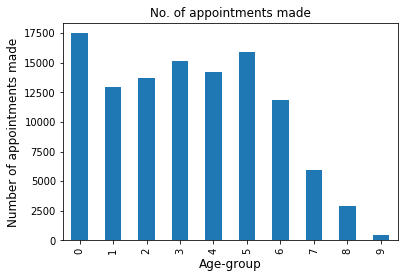

In [142]:

ind=df2.age_group.value_counts().index

df2.age_group.value_counts()[ind].sort_index().plot(kind='bar',)
plt.title('No. of appointments made')
plt.xlabel('Age-group', size=12)
plt.ylabel('Number of appointments made', size = 12);

We see that young children(age group 0, age b/w 0 to 9) are more likely to make appointments than teenagers(age group 2 and 3) and young adults. This might be because parents take good care of their young children and appointments are generally made by them.

Also Older people above age 60, as they grow older tend to make less appointments.

### What proportion of people did not show up for the appointment?

22314


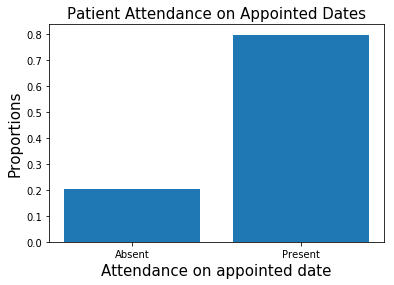

In [143]:
# Patients who didn't show up.
not_show = df[df['no_show']=='Yes'].shape[0]
print(not_show)

total_appn = df.shape[0]
# Percentage of People who didn't show up on appointments
not_show_propn= not_show/total_appn
show_propn = 1- not_show_propn

heights= [not_show_propn, show_propn]
plt.bar(['Absent', 'Present'], heights)
plt.title('Patient Attendance on Appointed Dates', size =15)
plt.xlabel('Attendance on appointed date', size =15)
plt.ylabel('Proportions', size =15);

Now we know that 20% (1 in every 5) patients didn't show up for their medical appointment. We will see what factors may be responsible for their absence. 

### Did sending SMS affected the decision of patients to show up for appointment?
We create 2 dataframes representing the show appointments and no show appointments

In [144]:
show_df = df2[df2['no_show']=='No']
show_df.head()

patient_ID gender       scheduled_day  \
appointment_ID                                                     
5642903         29872499824296.000000      F 2016-04-29 18:38:08   
5642503        558997776694438.000000      M 2016-04-29 16:08:27   
5642549          4262962299951.000000      F 2016-04-29 16:19:04   
5642828           867951213174.000000      F 2016-04-29 17:29:31   
5642494          8841186448183.000000      F 2016-04-29 16:07:23   

               appointment_day  age      neighbourhood  scholarship  \
appointment_ID                                                        
5642903             2016-04-29   62    JARDIM DA PENHA            0   
5642503             2016-04-29   56    JARDIM DA PENHA            0   
5642549             2016-04-29   62      MATA DA PRAIA            0   
5642828             2016-04-29    8  PONTAL DE CAMBURI            0   
5642494             2016-04-29   56    JARDIM DA PENHA            0   

                hypertension  diabetes  alcoholism  handicap  SMS_received  \
appointment_ID                                                               
5642903                    1         0           0         0             0   
5642503                    0         0           0         0             0   
5642549                    0         0           0         0             0   
5642828                    0         0           0         0             0   
5642494                    1         1           0         0             0   

               no_show  lead_days  is_handicapped  age_group  
appointment_ID                                                
5642903             No          0           False          6  
5642503             No          0           False          5  
5642549             No          0           False          6  
5642828             No          0           False          0  
5642494             No          0           False          5

In [145]:
no_show_df = df2[df2['no_show']=='Yes']
no_show_df.head()

patient_ID gender       scheduled_day  \
appointment_ID                                                     
5630279        733688164476661.000000      F 2016-04-27 15:05:12   
5630575          3449833394123.000000      F 2016-04-27 15:39:58   
5620163          7542951368435.000000      M 2016-04-26 08:44:12   
5633460         14794966191172.000000      F 2016-04-28 09:28:57   
5626083        622257462899397.000000      F 2016-04-27 07:51:14   

               appointment_day  age   neighbourhood  scholarship  \
appointment_ID                                                     
5630279             2016-04-29   23      GOIABEIRAS            0   
5630575             2016-04-29   39      GOIABEIRAS            0   
5620163             2016-04-29   29  NOVA PALESTINA            0   
5633460             2016-04-29   40       CONQUISTA            1   
5626083             2016-04-29   30  NOVA PALESTINA            0   

                hypertension  diabetes  alcoholism  handicap  SMS_received  \
appointment_ID                                                               
5630279                    0         0           0         0             0   
5630575                    0         0           0         0             0   
5620163                    0         0           0         0             1   
5633460                    0         0           0         0             0   
5626083                    0         0           0         0             0   

               no_show  lead_days  is_handicapped  age_group  
appointment_ID                                                
5630279            Yes          2           False          2  
5630575            Yes          2           False          3  
5620163            Yes          3           False          2  
5633460            Yes          1           False          4  
5626083            Yes          2           False          3

88207 22314
25698
9784
0.2913374222
0.438469122524


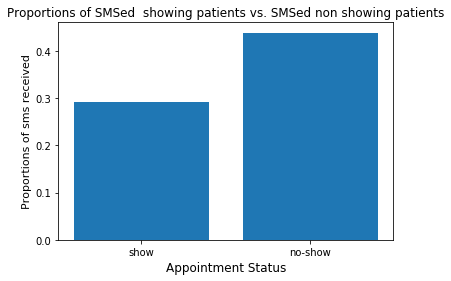

In [146]:
#size of no_show appointments and show dataframes.
print(show_df.shape[0],no_show_df.shape[0])
#no. of appointments in wich sms was recieved and
# 1. patients did show up.
print(show_df[show_df['SMS_received']==1]['age'].count())
# 2. patients did not show up
print(no_show_df[no_show_df['SMS_received']==1]['age'].count())
#their respective proportions.
sms_prop_show = (show_df[show_df['SMS_received']==1]['age'].count())/(show_df.shape[0])
print(sms_prop_show)
sms_prop_no_show= (no_show_df[no_show_df['SMS_received']==1]['age'].count())/(no_show_df.shape[0])
print(sms_prop_no_show)

plt.bar([1,2], [sms_prop_show,sms_prop_no_show ], tick_label=['show', 'no-show'])
plt.title('Proportions of SMSed  showing patients vs. SMSed non showing patients')
plt.xlabel('Appointment Status', size=12)
plt.ylabel('Proportions of sms received', size =11);

Surprisingly, the patients who did not receive sms regarding their appointment have higher proportion of patients showing up for their appointment. Or there is a better relation of sms with another feature which is interlinked with No show more strongly. 

### Is there any relationship between SMS_received and lead_days?

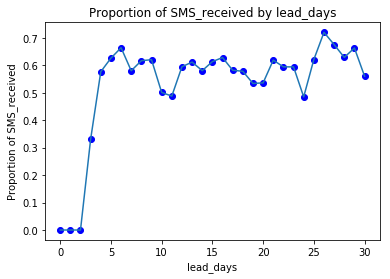

Proportion of SMS_received for lead_days > 30
0.617652726922


In [147]:
# Create a line plot of SMS_received by lead_days, up to lead_days == 30
# then print the number for the rest of the data so that they don't obscure
# the focus.
x = df.groupby('lead_days')['SMS_received'].mean()[:31].index
y = df.groupby('lead_days')['SMS_received'].mean()[:31].values
plt.plot(x,y, 'bo')
plt.plot(x,y)
plt.title('Proportion of SMS_received by lead_days')
plt.xlabel('lead_days')
plt.ylabel('Proportion of SMS_received')
plt.show()

print('Proportion of SMS_received for lead_days > 30')
print(df[df.lead_days > 30]['SMS_received'].mean())

If the appointment is 2 days away or sooner from the time it was scheduled, none of the patients received an SMS message. Starting from lead_days == 3, we start to see some True values in SMS_received. But the ratio of SMS_received plateaus only at lead_days == 4 (or arguably 5).

As lead_days has a strong relationship with no_show, and SMS_received is very much related to lead_days when lead_days < 4, we must be careful when trying to establish a causal relationship between SMS_received and no_show.

Next we'll take only the records where lead_days > 3, and see if those who received the SMS reminder have a different no-show rate from those who didn't.

40121 17163
24985
9591
0.622741207846
0.558818388394


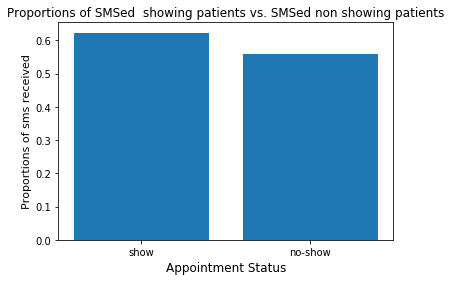

In [148]:
lead_days_3 = df[df.lead_days > 3]
# we create 2 new dataframes representing the show appointments and no show appointments
new_no_show_df = lead_days_3[lead_days_3['no_show']=='Yes']
new_no_show_df.head()

new_show_df = lead_days_3[lead_days_3['no_show']=='No']
new_show_df.head()
#size of no_show_
print(new_show_df.shape[0],new_no_show_df.shape[0])
#no. of appointments in wich sms was recieved and
# 1. patients did show up.
print(new_show_df[new_show_df['SMS_received']==1]['age'].count())
# 2. patients did not show up
print(new_no_show_df[new_no_show_df['SMS_received']==1]['age'].count())
#their respective proportions.
new_sms_prop_show = (new_show_df[new_show_df['SMS_received']==1]['age'].count())/(new_show_df.shape[0])
print(new_sms_prop_show)
new_sms_prop_no_show= (new_no_show_df[new_no_show_df['SMS_received']==1]['age'].count())/(new_no_show_df.shape[0])
print(new_sms_prop_no_show)

plt.bar([1,2], [new_sms_prop_show,new_sms_prop_no_show ], tick_label=['show', 'no-show'])
plt.title('Proportions of SMSed  showing patients vs. SMSed non showing patients')
plt.xlabel('Appointment Status', size=12)
plt.ylabel('Proportions of sms received', size =11);

A few other columns, such as alcoholism and scholarship, also seem to show patterns of their proportions varying with lead_days when lead_days are small (not shown here). Although these patterns are not as strong as that between SMS_received and lead_days.

### Does age affect the decision of patients not to show up for appointment?

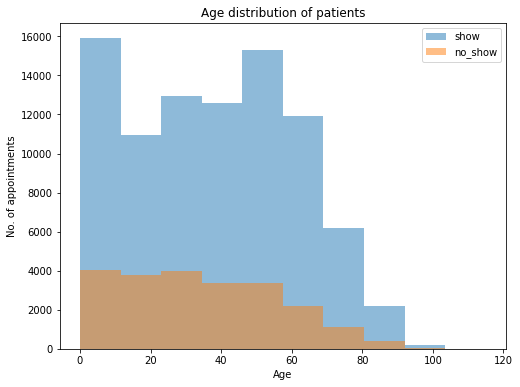

In [149]:
fig, ax= plt.subplots(figsize=(8,6))
ax.hist(show_df['age'], alpha=0.5, label= 'show')
ax.hist(no_show_df['age'], alpha=0.5, label= 'no_show')
ax.set_title('Age distribution of patients')
ax.set_xlabel('Age')
ax.set_ylabel('No. of appointments')
ax.legend(loc='upper right')
plt.show()

We see that show up rates of young children(age 0 to 9) are way more than that of teenagers.
This is not followed in no show rates i.e. if not more than 50 years the age of patients does not matter much when they don't show up. Both distributions tend to decrease after 60.

### Does Scholarship effect Patient's decision to show up for appointmnet?
We use the same show_df and no_show_df we used above.

In [150]:
no_show_df['scholarship'].value_counts()

0    19736
1     2578
Name: scholarship, dtype: int64

In [151]:
#we will find the proportion of people who recieved scholarship but did not show up

srn = no_show_df[no_show_df['scholarship']==1]['age'].count() # scholarship received no show
print(srn)
total_no_show= no_show_df['age'].count()
print(total_no_show)
srn_propn = srn/total_no_show
print(srn_propn)


2578
22314
0.115532849332


In [152]:
#we will find the proportion of people who recieved scholarship and showed up

srs = show_df[show_df['scholarship']==1]['age'].count() # scholarship received  show up
print(srs)
total_show= show_df['age'].count()
print(total_show)
srs_propn = srs/total_show
print(srs_propn)


8283
88207
0.0939041119186


<Container object of 2 artists>

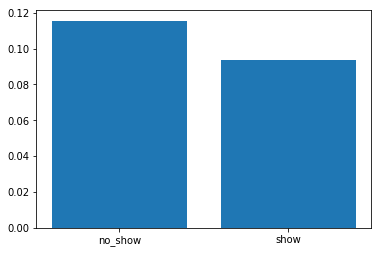

In [153]:
plt.bar([1,2], [srn_propn, srs_propn], tick_label= ['no_show','show'] )


We can see that the no_show rates have higher proportion of patients with scolarships.

<a id='conclusions'></a>
## Conclusions
> **Conclusions**
>>1. Female patients make up almost two thirds of the visits.It might be that women are more concerned of their body then men are.
>>2. We see that young children(age group 0, age b/w 0 to 9) are more likely to make appointments than teenagers(age group 2 and 3) and young adults. This might be because parents take good care of their young children and appointments are generally made by them.Also Older people above age 60, as they grow older tend to make less appointments.
>>3. Lead days are strongly correlated with SMS received.If the appointment is 2 days away or sooner from the time it was scheduled, none of the patients received an SMS message. Starting from lead_days == 3, we start to see some True values in SMS_received. But the ratio of SMS_received plateaus only at lead_days == 4 (or arguably 5).
>>4. When Lead Days are removed patients who received sms showed up more than those who did not.
>>5.We see that show up rates of young children(age 0 to 9) are way more than that of teenagers. This is not followed in no show rates i.e. if not more than 50 years the age of patients does not matter much when they don't show up. Both distributions tend to decrease after 60.
>>6. We see that people who did not show up have higher proportions of patients with scholarships than those who did show up. This does not add up and may be scholarships are correlated with other feture which is better related to no show.

>The investigation carried out in this study is exploratory and is meant to provide insights for further analysis. A few of the limitations of this study are:

    1. Interrelationship between features are not sufficiently investigated. Multicollinearity is not accounted for.
    2. Some features may have a non-linear relationship with no_show and we have barely looked at that.
    3. It lacks the precision a statistical model can give us, in the magnitude of each of the feature coefficients and in the overall predictive power of the model.

Therefore the findings should not be interpreted as a predictive model, or any other means to make predictions.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])